In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

Explanation:
This cell imports necessary Python libraries:

 --pandas for data manipulation,

 --numpy for numerical operations,

 --matplotlib.pyplot and seaborn for data visualization,

 --csv for handling CSV file operations.

# Load The Data

In [5]:
# Load the metadata
ham_df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

Explanation:
Loads the main metadata file HAM10000_metadata.csv into a DataFrame called ham_df.
This file contains important structured information for each dermoscopic image, including:

--image_id: Unique ID for each image.

--dx: Diagnosed skin lesion type.

--dx_type: How the diagnosis was confirmed (histopathology, follow-up, etc.).

--age, sex, localization: Patient details and lesion location.

--lesion_id: Used to track whether multiple images come from the same lesion.

In [6]:
ham_df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

 Explanation:
This displays the first 5 rows of the metadata.

It helps you get an idea of the dataset's structure and values.

Based on your output, the dataset includes:

Multiple images per lesion (same lesion_id, different image_id).

Diagnosis type is consistent across those.

Metadata is complete for the initial entries shown.

# Understand the Data Structure

**features are available in the dataset**

In [8]:
ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


****missing or null values****

In [12]:
ham_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

As we can see, there are 57 null values in the age column.

**duplicate entries**

In [13]:
ham_df.duplicated().sum()

0

there are no duplicates entries

In [10]:
ham_df.describe()

age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

**the data types and unique values**

In [14]:
ham_df.nunique()

lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64

There are 10015 images are present here

#  Class Distribution (dx)

In [15]:
import squarify

**How many lesion classes are present?**

In [68]:
ham_df['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

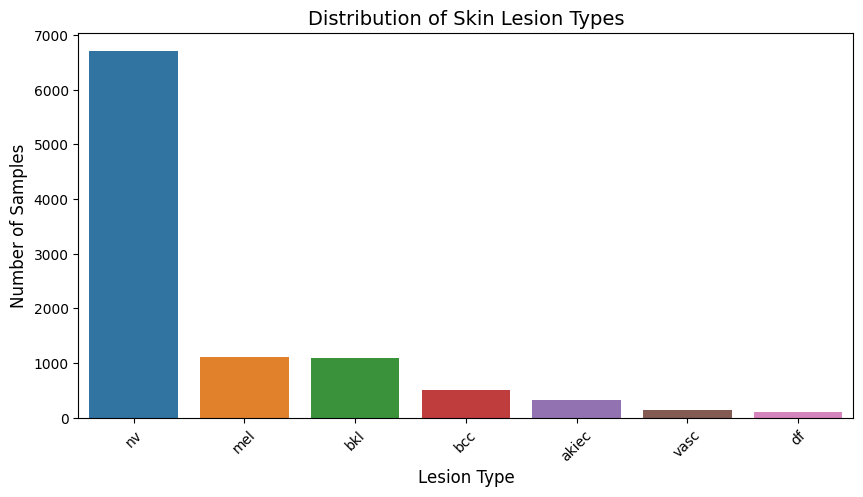

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(data=ham_df, x='dx', order=ham_df['dx'].value_counts().index)
plt.title('Distribution of Skin Lesion Types', fontsize=14)
plt.xlabel('Lesion Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Pie Chart**

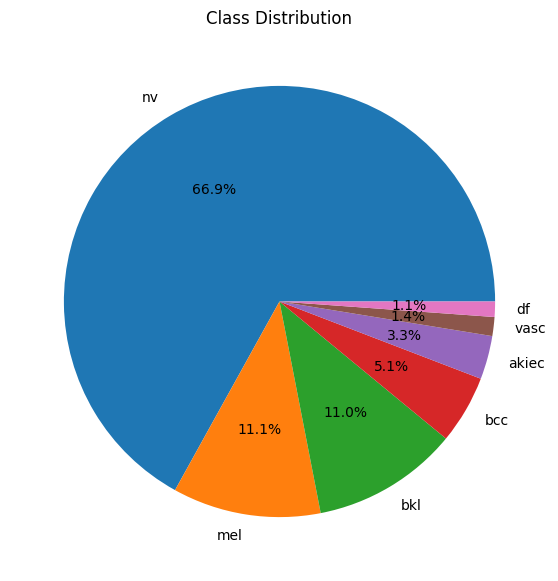

In [140]:
# Pie chart
ham_df['dx'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7), title='Class Distribution')
plt.ylabel('')
plt.show()

**Tree map**

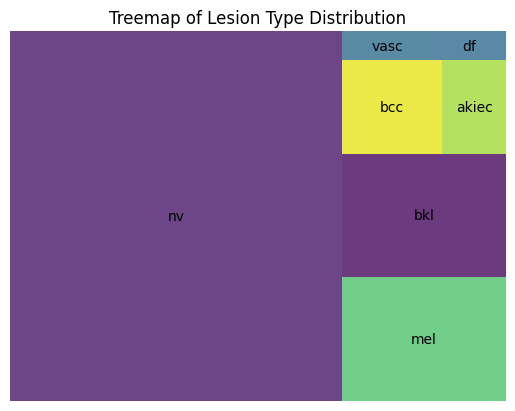

In [17]:
# Treemap visualization
labels = ham_df['dx'].value_counts().index
sizes = ham_df['dx'].value_counts().values
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Treemap of Lesion Type Distribution')
plt.axis('off')
plt.show()

Class imbalance is severe: e.g., nv is dominant; df, vasc are rare.

> The model will be biased toward dominant classes unless balanced. This guides us to apply augmentation or reweighting.

# Age Analysis

**overall age distribution**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


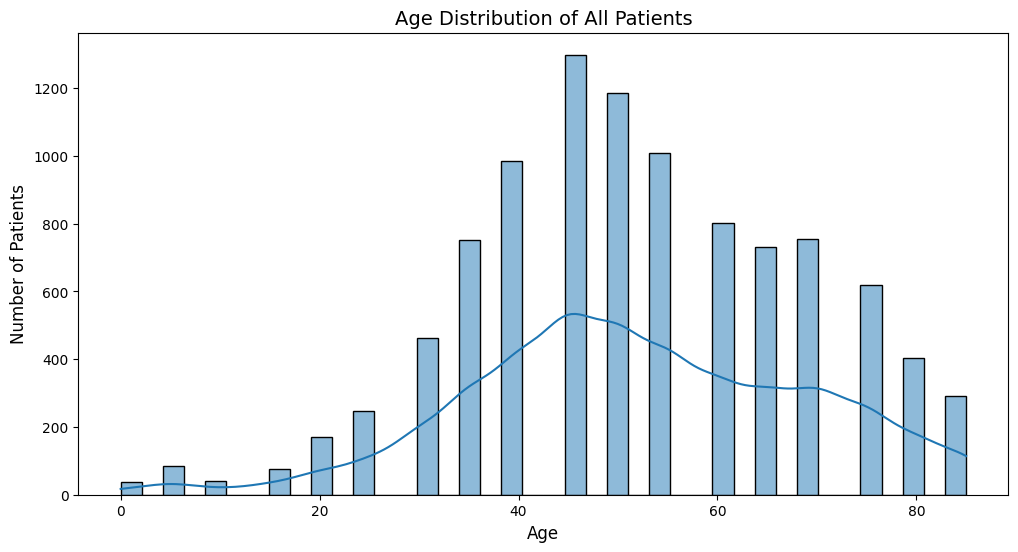

In [82]:
plt.figure(figsize=(12,6));
sns.histplot(ham_df['age'].dropna(), bins=40, kde=True);
plt.title("Age Distribution of All Patients", fontsize=14);
plt.xlabel("Age", fontsize=12);
plt.ylabel("Number of Patients", fontsize=12);
plt.show();

**certain lesion types cluster by age**

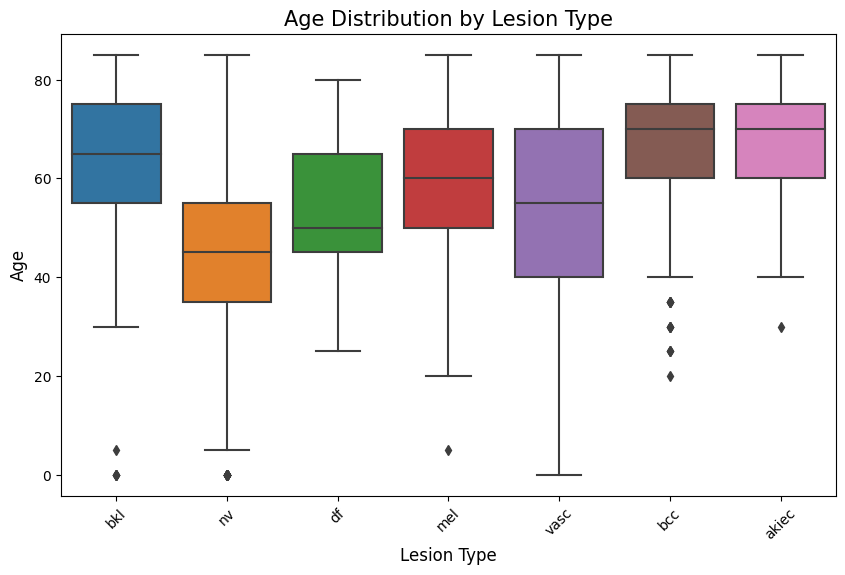

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(x='dx', y='age', data=ham_df)
plt.xticks(rotation=45)
plt.xlabel("Lesion Type", fontsize=12);
plt.ylabel("Age", fontsize=12);
plt.title('Age Distribution by Lesion Type', fontsize= 15)
plt.show()

Lesions like mel appear more frequently in older populations.

**Are there age outliers?**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

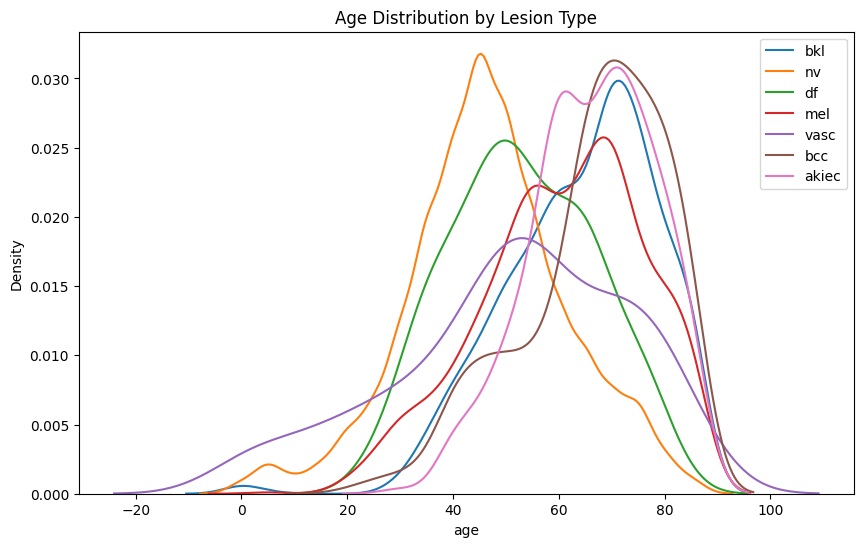

In [26]:
# KDE Plot
plt.figure(figsize=(10,6));
for dx in ham_df['dx'].unique():
    sns.kdeplot(ham_df[ham_df['dx'] == dx]['age'], label=dx);
plt.legend();
plt.title('Age Distribution by Lesion Type');
plt.show();

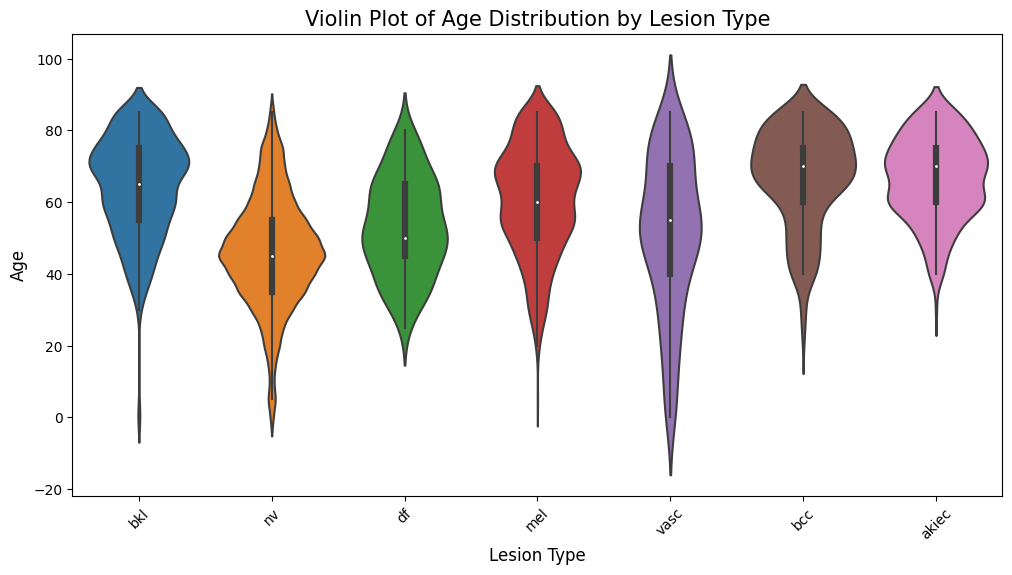

In [87]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='dx', y='age', data=ham_df)
plt.xlabel("Lesion Type", fontsize=12);
plt.ylabel("Age", fontsize=12);
plt.title('Violin Plot of Age Distribution by Lesion Type', fontsize= 15)
plt.xticks(rotation=45)
plt.show()

Some age outliers (below 10) are rare.

✅ Assumption:
Lesion types exhibit age dependency — age can be a useful feature for classification.



# Gender Analysis

**the overall sex distribution**

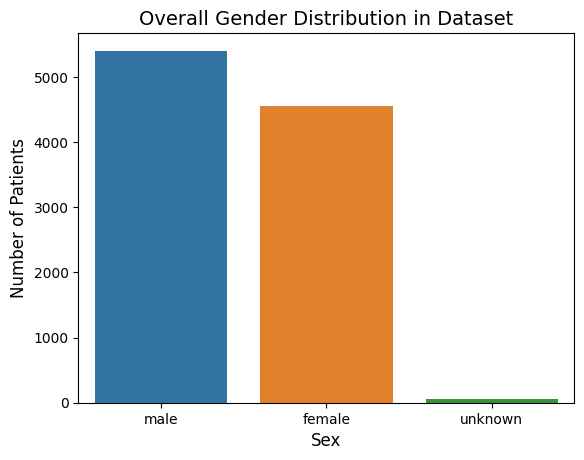

In [100]:
sns.countplot(data=ham_df, x='sex')
plt.title("Overall Gender Distribution in Dataset", fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()


Females slightly outnumber males.

**some lesion types show gender predominance**

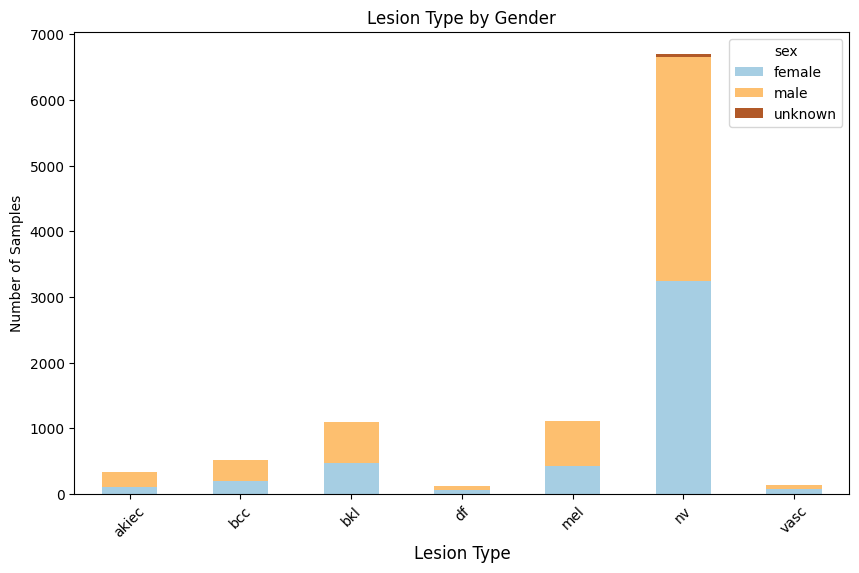

In [89]:
# Stacked bar chart
gender_dx = pd.crosstab(ham_df['dx'], ham_df['sex'])
gender_dx.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Lesion Type by Gender')
plt.xticks(rotation=45)
plt.xlabel("Lesion Type", fontsize=12);
plt.ylabel('Number of Samples')
plt.show()

**Gender Distribution by Lesion Type**

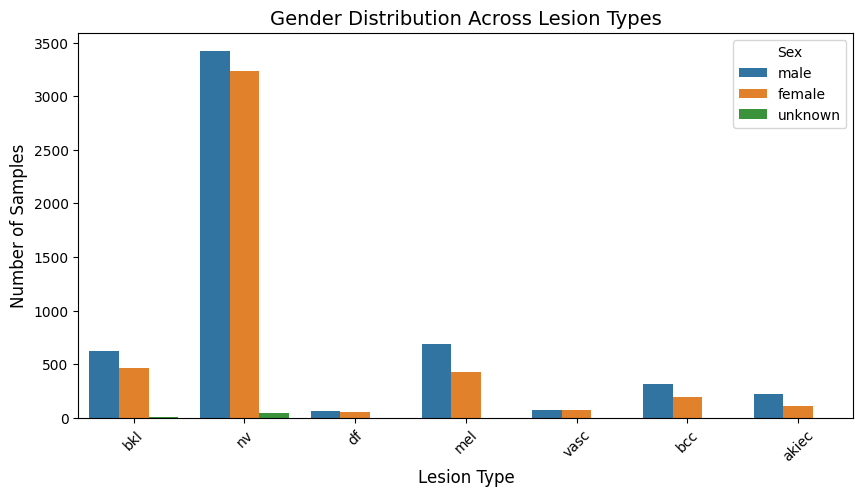

In [102]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ham_df, x='dx', hue='sex')
plt.title("Gender Distribution Across Lesion Types", fontsize=14)
plt.xlabel('Lesion Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


Certain lesions like bkl or mel may have gender patterns.

✅ Assumption:
Gender adds subtle but meaningful variance. Can be encoded for model features.

# Lesion Localization

**Which body parts are most affected?**

In [71]:
ham_df['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

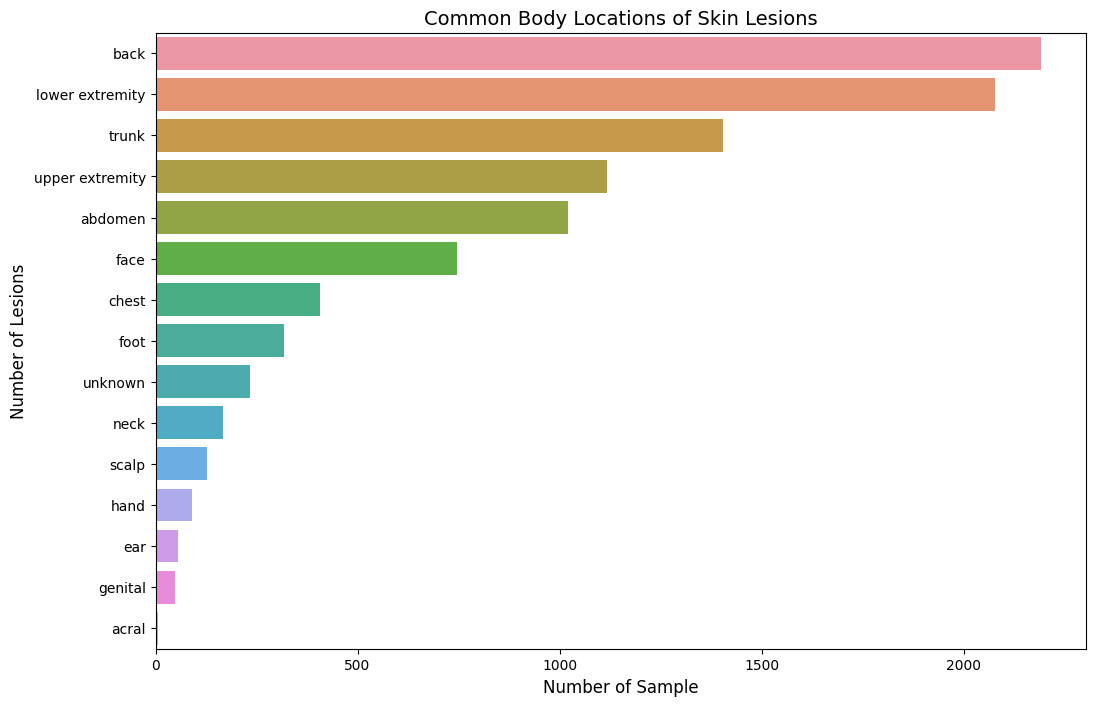

In [108]:
plt.figure(figsize=(12, 8))
sns.countplot(data=ham_df, y='localization', order=ham_df['localization'].value_counts().index)
plt.title("Common Body Locations of Skin Lesions", fontsize=14)
plt.xlabel('Body Location', fontsize=12)
plt.ylabel('Number of Lesions', fontsize=12)
plt.xlabel('Number of Sample');
plt.show()


Most lesions on back, lower extremity , and trunk.

**Are some lesion types more frequent in specific locations?**

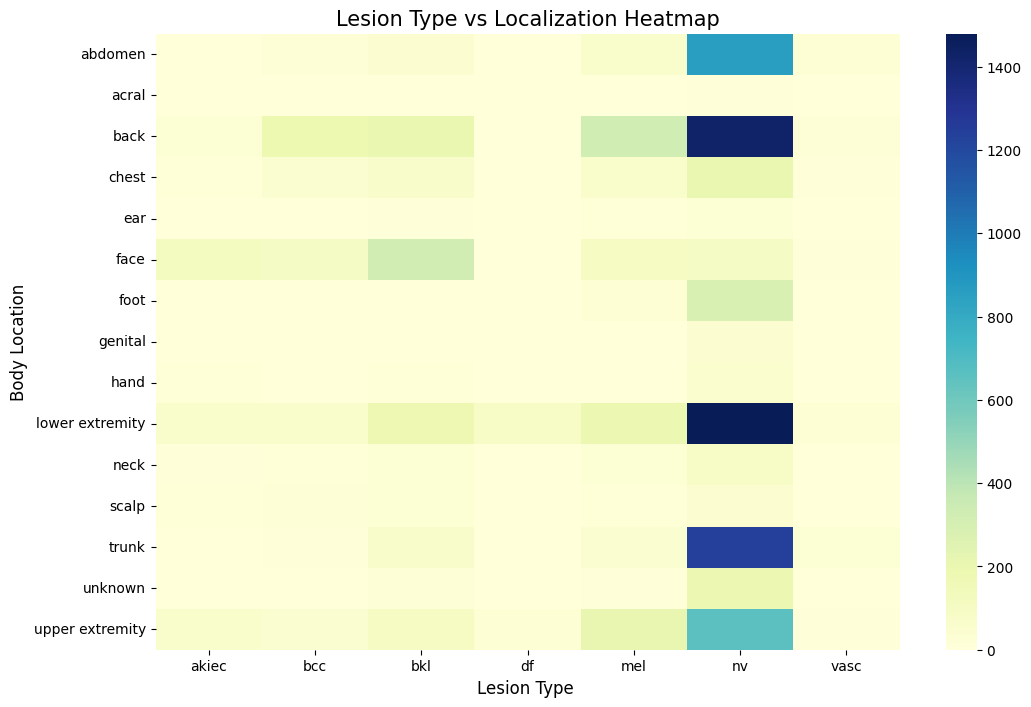

In [109]:
# Heatmap: dx vs. localization
loc_dx_ct = pd.crosstab(ham_df['localization'], ham_df['dx'])
plt.figure(figsize=(12,8))
sns.heatmap(loc_dx_ct, cmap='YlGnBu', annot=False)
plt.title('Lesion Type vs Localization Heatmap', fontsize=15)
plt.xlabel("Lesion Type ", fontsize=12);
plt.ylabel('Body Location', fontsize=12)
plt.show()

Some types are highly location-specific.

✅ Assumption:
Localization patterns support lesion-type classification. Should be one-hot encoded in models.

**Localization vs Lesion Type (Stacked Countplot)**

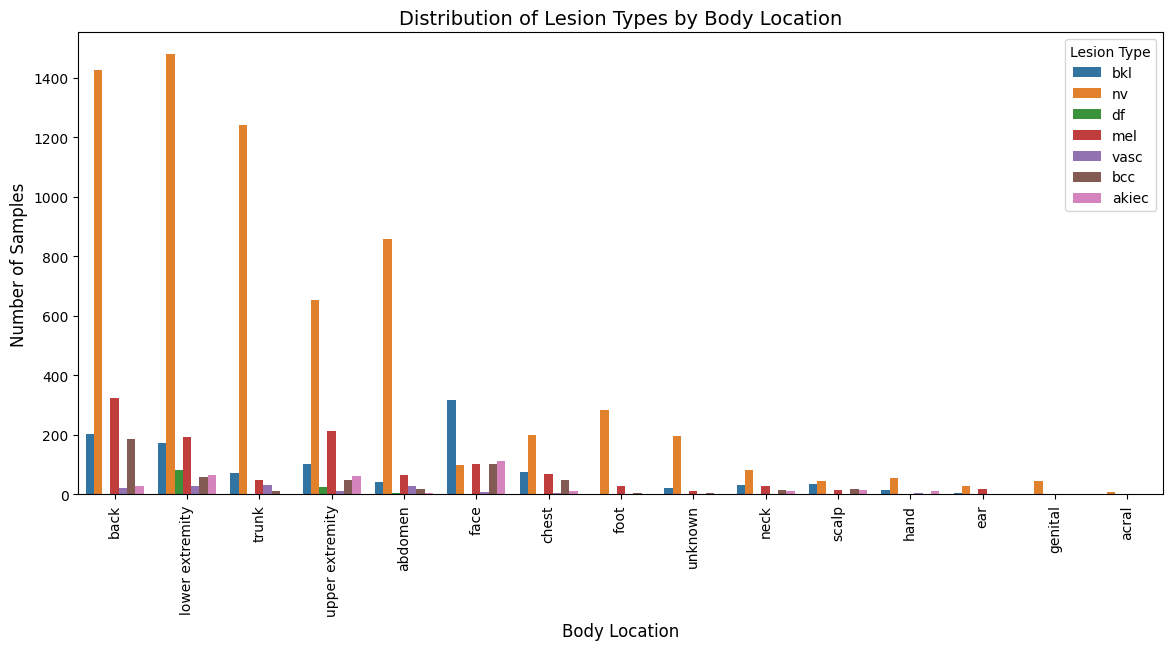

In [111]:
plt.figure(figsize=(14, 6))
sns.countplot(data=ham_df, x='localization', hue='dx', order=ham_df['localization'].value_counts().index)
plt.title("Distribution of Lesion Types by Body Location", fontsize=14)
plt.xlabel('Body Location', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Lesion Type')
plt.show()


# Multivariate Relations

**Do age, gender, and localization jointly predict lesion type?****

In [38]:
print(ham_df['sex'].unique())

['male' 'female' 'unknown']


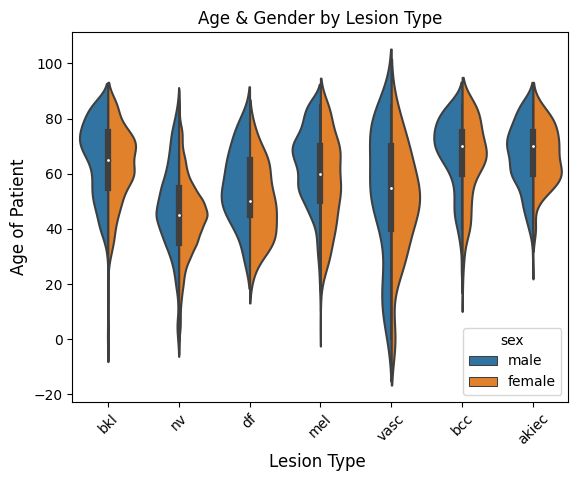

In [94]:
# Drop rows where 'sex' is missing or invalid
ham_df_viz = ham_df[ham_df['sex'].isin(['male', 'female'])]

# Now plot
sns.violinplot(data=ham_df_viz, x='dx', y='age', hue='sex', split=True)
plt.title('Age & Gender by Lesion Type')
plt.xlabel("Lesion Type ", fontsize=12);
plt.ylabel('Age of Patient', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Are there hidden clusters?**

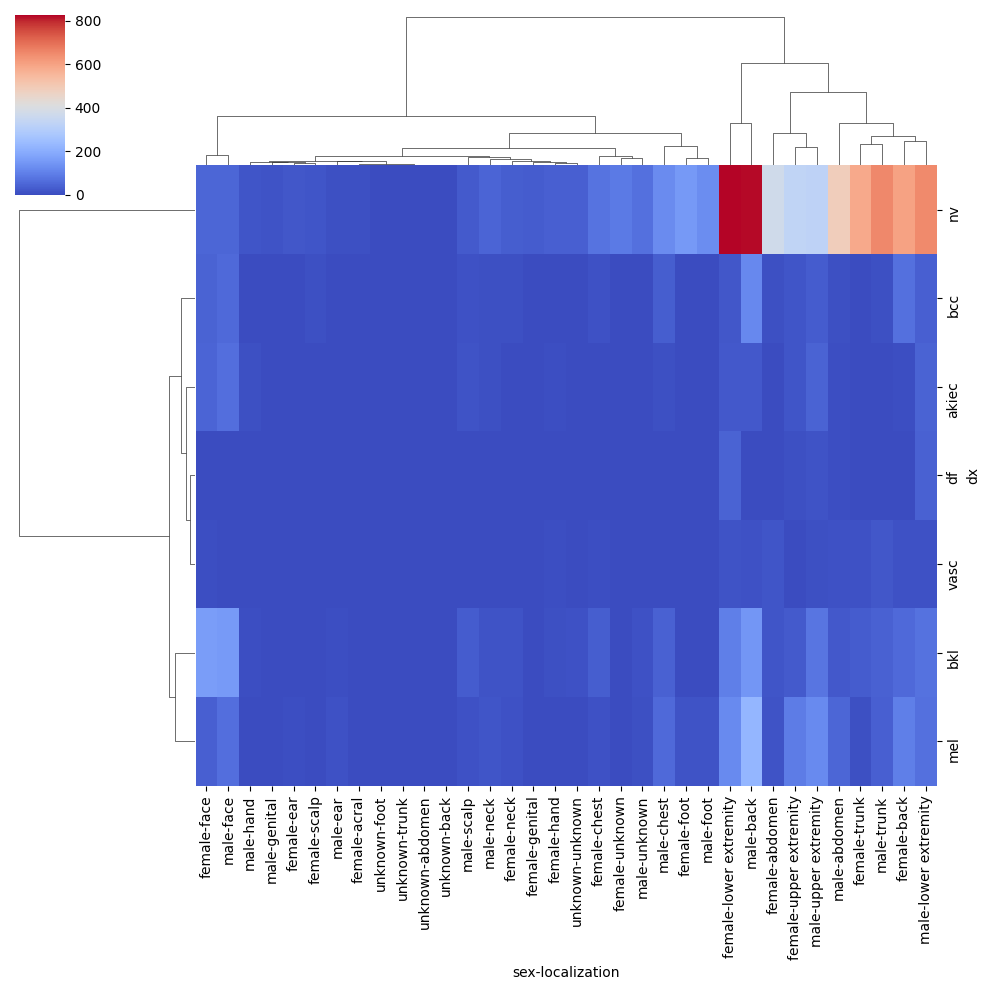

In [96]:
# Clustermap
sns.clustermap(pd.crosstab(ham_df['dx'], [ham_df['sex'], ham_df['localization']]), cmap='coolwarm');

✅ Assumption:
Multivariate patterns are valuable for feature interactions. Age-sex-localization triads are promising composite features.

# Lesion Type vs Demographics & Location

**What is the combined impact of age, sex, and location on lesion types?**

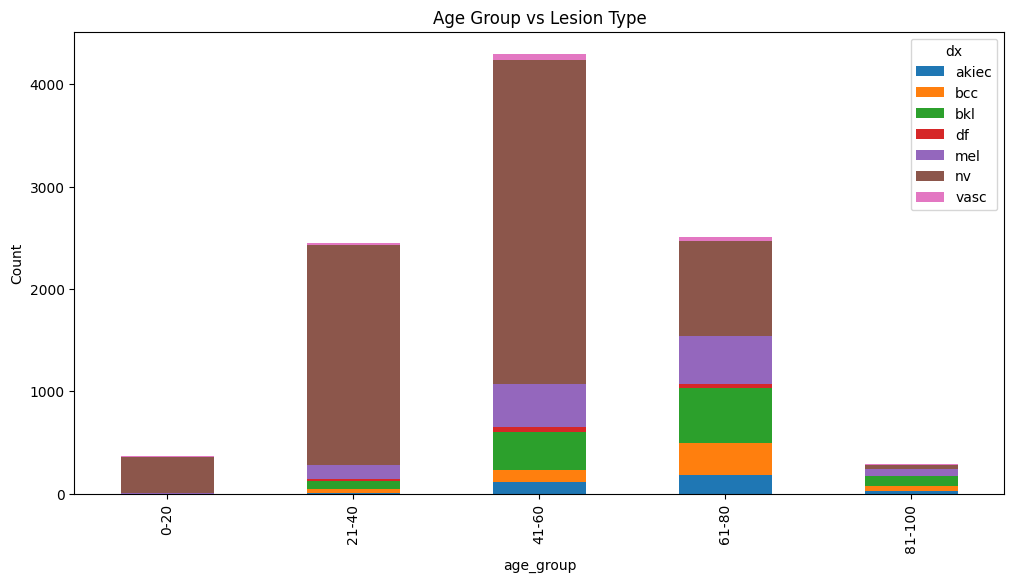

In [40]:
# Age group creation
ham_df['age_group'] = pd.cut(ham_df['age'], bins=[0, 20, 40, 60, 80, 100], 
                         labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Crosstab heatmap: Age group vs Lesion Type
pd.crosstab(ham_df['age_group'], ham_df['dx']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Age Group vs Lesion Type")
plt.ylabel("Count")
plt.show()


**Age Group Segmentation vs Lesion Type (Heatmap)**

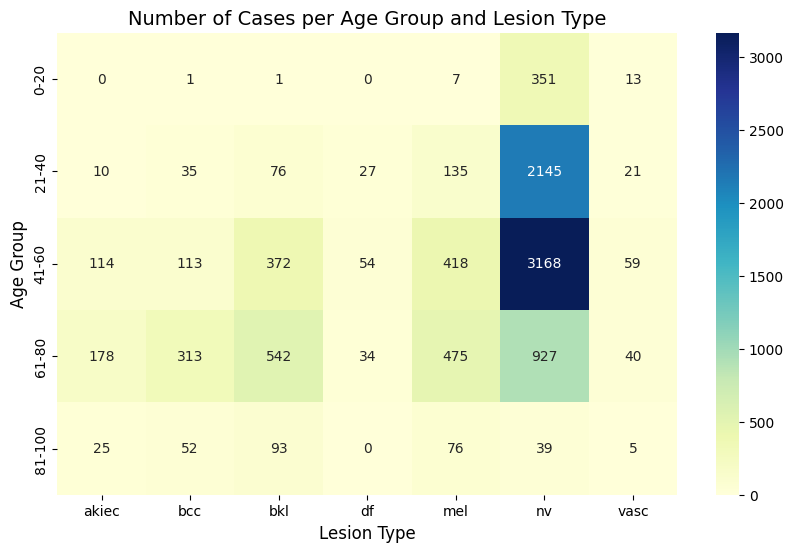

In [98]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
ham_df['age_group'] = pd.cut(ham_df['age'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(ham_df['age_group'], ham_df['dx']), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Number of Cases per Age Group and Lesion Type", fontsize=14)
plt.xlabel('Lesion Type', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.show()


# Diagnosis Type (dx_type)

**Diagnosis Method Distribution**

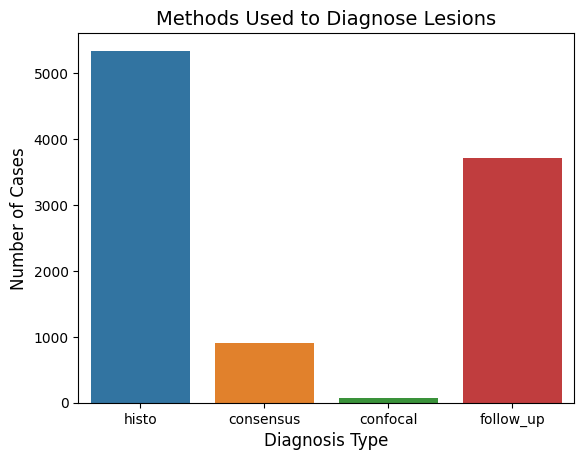

In [72]:
sns.countplot(data=ham_df, x='dx_type')
plt.title("Methods Used to Diagnose Lesions", fontsize=14)
plt.xlabel('Diagnosis Type', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.show()


**Which lesions are confirmed histopathologically?**

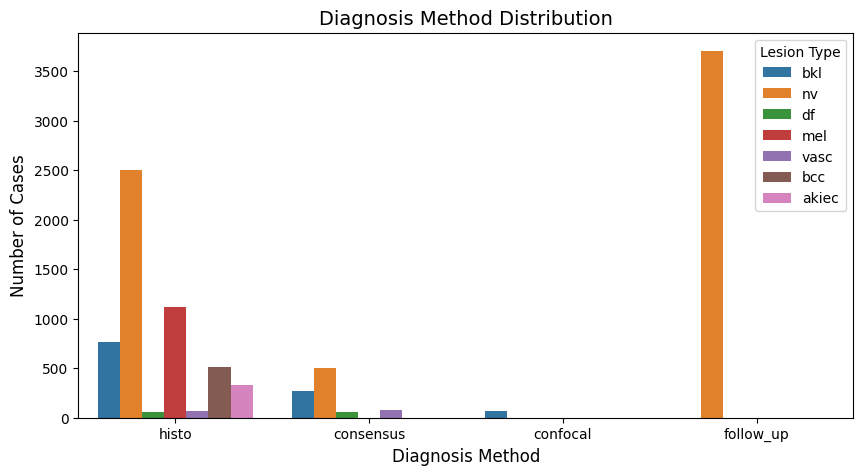

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ham_df, x='dx_type', hue='dx')
plt.title('Diagnosis Method Distribution', fontsize=14)
plt.xlabel('Diagnosis Method', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title='Lesion Type')
plt.show()


**Does confirmation method vary by class?**

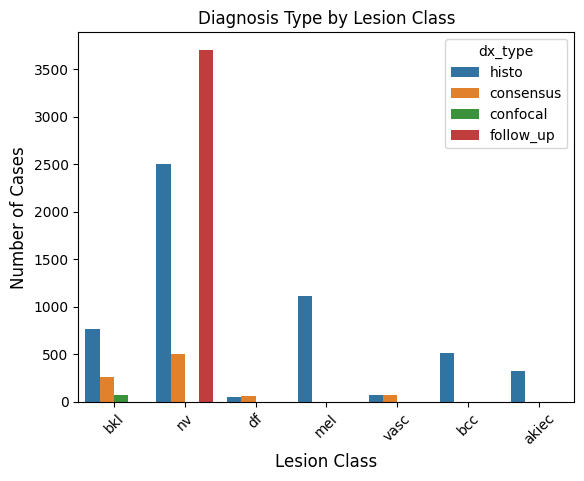

In [77]:
sns.countplot(x='dx', hue='dx_type', data=ham_df)
plt.xticks(rotation=45)
plt.title('Diagnosis Type by Lesion Class')
plt.xlabel('Lesion Class', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.show()

✅ Assumption:
dx_type provides confidence levels. Histology-confirmed cases can be used for a high-confidence subset.

# Lesion ID / Multiple Images

**Are multiple images of the same lesion present?**

In [45]:
print(f"Total Images: {ham_df.shape[0]}")
print(f"Unique Lesions: {ham_df['lesion_id'].nunique()}")

Total Images: 10015
Unique Lesions: 7470


In [78]:
# Lesions with multiple images
multiple_images = ham_df['lesion_id'].value_counts()
multiple_images = multiple_images[multiple_images > 1]

print(f"Lesions with > 1 image: {len(multiple_images)}")


Lesions with > 1 image: 1956


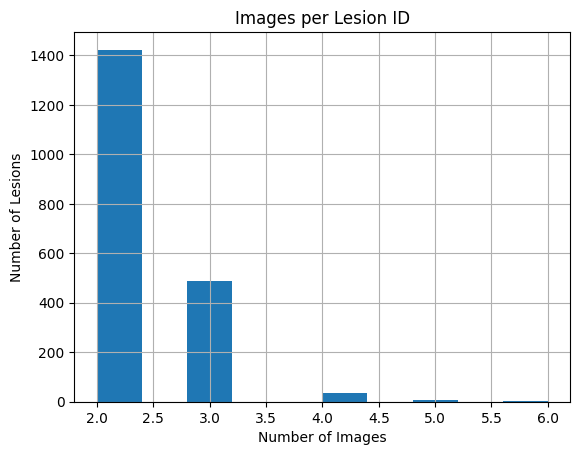

In [139]:
# Histogram
multiple_images.hist(bins=10);
plt.title('Images per Lesion ID');
plt.xlabel('Number of Images');
plt.ylabel('Number of Lesions');
plt.show();

**How many unique lesions exist?**

In [137]:
# Count how many images each lesion has
lesion_counts = ham_df['lesion_id'].value_counts()

# Count how many lesions have 1 image, 2 images, etc.
lesion_group_counts = lesion_counts.value_counts().sort_index()

# Reset index safely
lesion_group_df = lesion_group_counts.rename_axis('Image Count per Lesion').reset_index(name='Number of Unique Lesions')

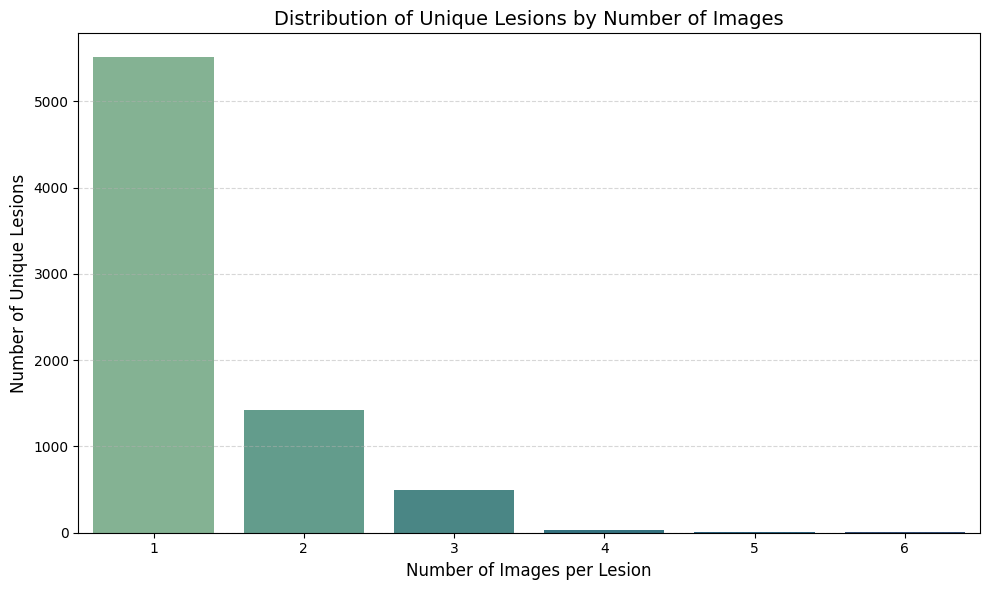

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(data=lesion_group_df, x='Image Count per Lesion', y='Number of Unique Lesions', palette='crest')

plt.title('Distribution of Unique Lesions by Number of Images', fontsize=14)
plt.xlabel('Number of Images per Lesion', fontsize=12)
plt.ylabel('Number of Unique Lesions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Missing Data Exploration**

In [129]:
missing_values = ham_df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
age_group       96
dtype: int64


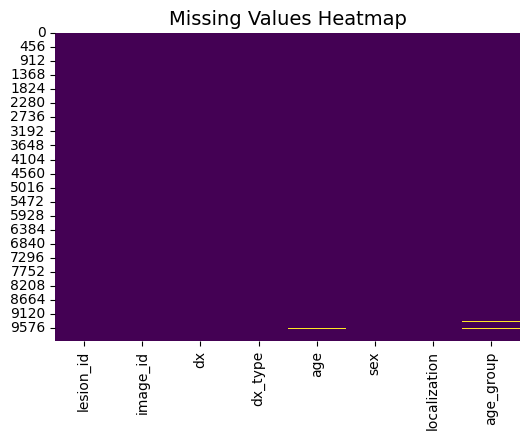

In [131]:
plt.figure(figsize=(6, 4))
sns.heatmap(ham_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

**How should we split train/test?**

✅ Assumption:
To prevent data leakage, train/test splits must be stratified by lesion_id, not image_id.

# Cross-Tabs & Heatmaps

**Are there high-risk combinations (e.g., elderly women with certain lesions)?**

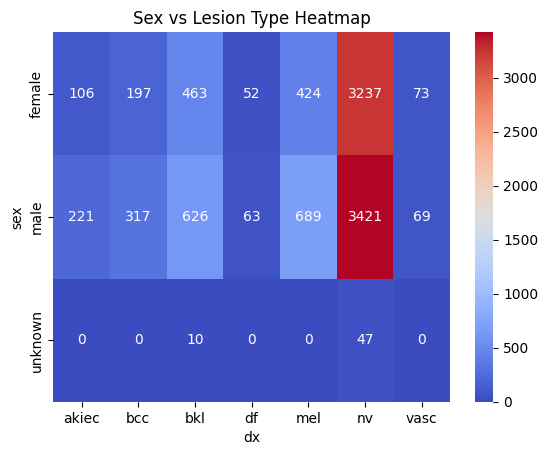

In [54]:
# Crosstab: sex vs dx
crosstab1 = pd.crosstab(ham_df['sex'], ham_df['dx'])
sns.heatmap(crosstab1, annot=True, fmt='d', cmap='coolwarm')
plt.title("Sex vs Lesion Type Heatmap")
plt.show()

**What are the strongest associations?**

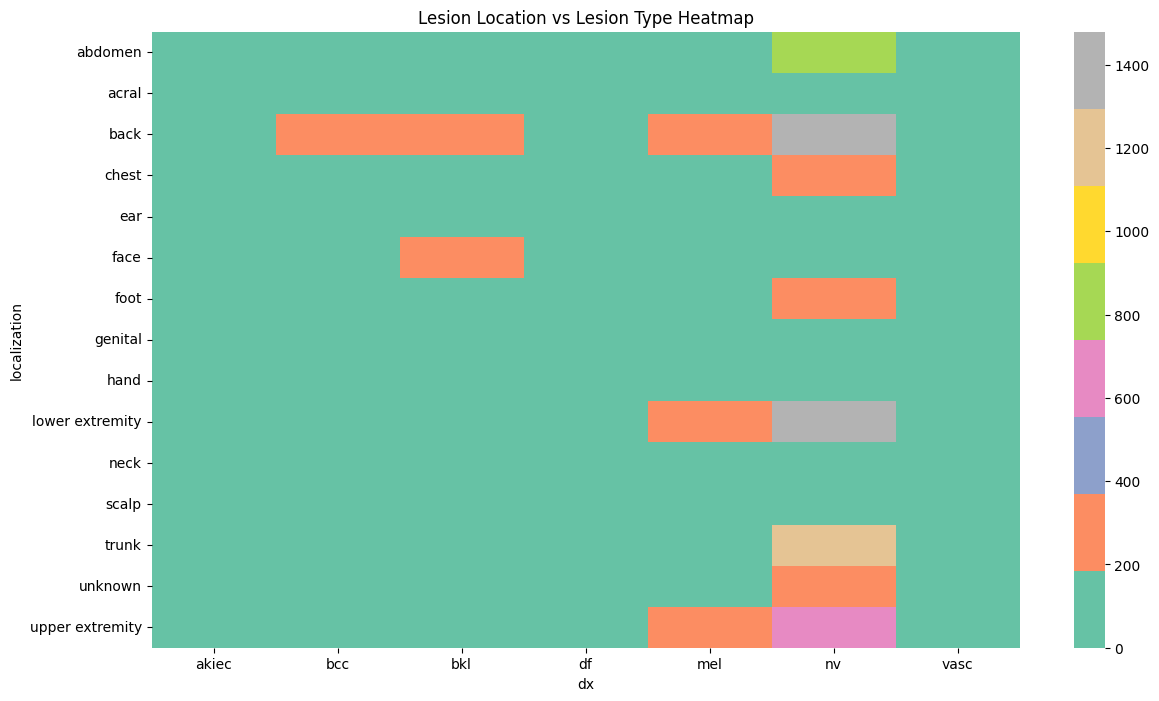

In [57]:
# Crosstab: localization vs dx
crosstab2 = pd.crosstab(ham_df['localization'], ham_df['dx'])
plt.figure(figsize=(14,8))
sns.heatmap(crosstab2, annot=False, cmap='Set2')
plt.title("Lesion Location vs Lesion Type Heatmap")
plt.show()

**Cross-tab: Lesion Type vs Gender vs Localization**

In [120]:
dx_code=pd.crosstab([ham_df['dx'], ham_df['sex']], ham_df['localization'])
dx_code.head()

localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx    sex                                                                   
akiec female        1      0     5      3    0    48     0        0     4   
      male          4      0    24      9    3    65     0        0     9   
bcc   female        9      0    69     12    0    44     3        0     2   
      male          9      0   117     35    0    57     1        0     0   
bkl   female       19      0    55     35    2   162     1        2     9   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx    sex                                                                    
akiec female               23     3      0      0        0               19  
      male                 42     7     14      1        0               43  
bcc   female               21     7      7      2        2               19  
      male                 37     7     12      9        3               30  
bkl   female              100    15      3     32        2               26

# Sample Image Grid

**What do images of each lesion class look like?**

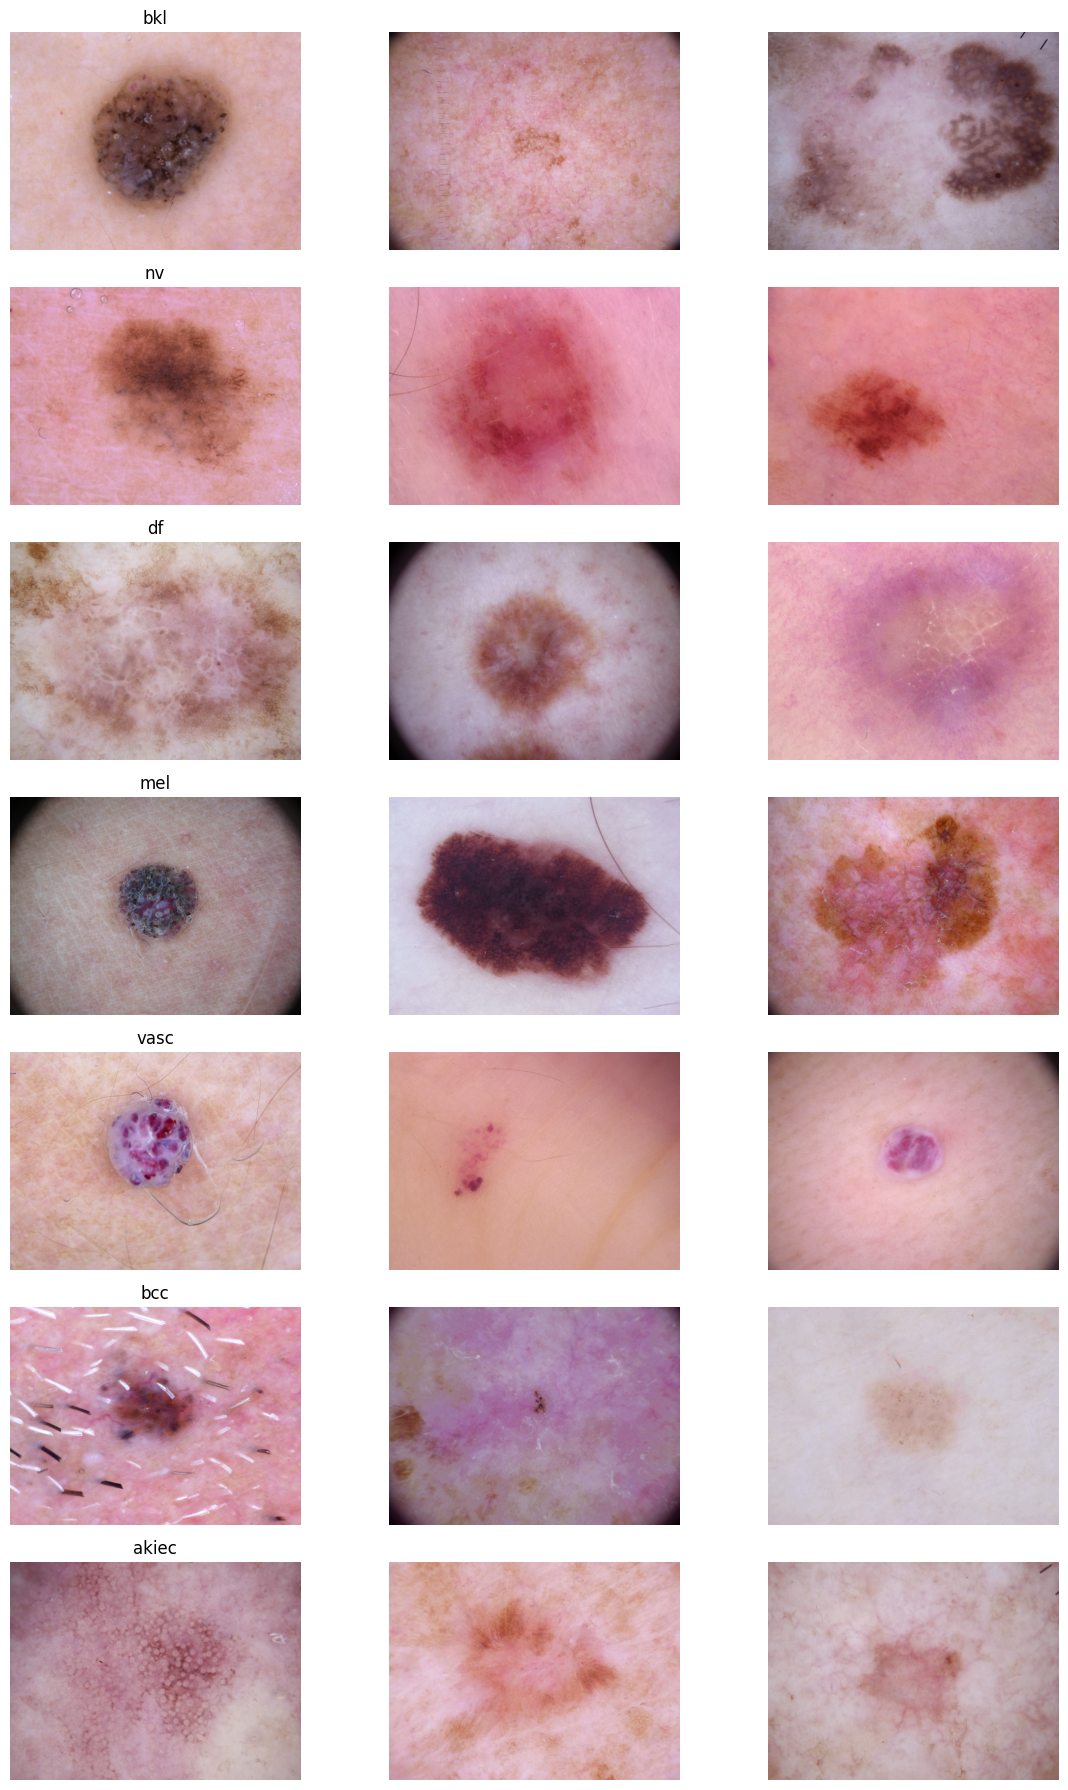

In [60]:
import os
from PIL import Image

# Directory for images
image_dir1 = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/"
image_dir2 = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/"

# Sample 3 images per class
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7, 3, figsize=(12, 18))
classes = ham_df['dx'].unique()

for i, dx_type in enumerate(classes):
    sample = ham_df[ham_df['dx'] == dx_type].sample(3)
    for j, img_id in enumerate(sample['image_id']):
        path = image_dir1 + img_id + ".jpg"
        if not os.path.exists(path):
            path = image_dir2 + img_id + ".jpg"
        image = Image.open(path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        axes[i, j].set_title(dx_type if j == 0 else "")
plt.tight_layout()
plt.show()